# Final Report: Market News Analysis on Bitcoin Pricing Trend
## Project Introduction

>In 2019, the Bitcoin market seems to release a signal of revival from 2018 Bitcoin Crash. We are glad to hear about that and wants to help people to know about this trend. Our goal is to explore the trend variation on the bitcoin market price based on the market news and social news.
PS: You could also find our github repository by clicking this [Link](https://github.com/edgeslab/cs418-project-slamming-squad-1/blob/master/Final_Report.ipynb)

In [104]:
!pip install -r ./requirements.txt > pip-log.txt

In [105]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from data_process import *
from eda_sentiment import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1 Data collection
Before our processing, we use the web crawler scripts to get our raw data and save them as csv files under same directory. Our rawdata consists of two parts: Bitcoin pricing and Bitcoin Media news. We download Bitcoin pricing from market and use python webcrawler techniques to get our media news data.

We collect news data from all popular Bitcoin media websites, like cryptocurrencynews.com, cryptonews.com, ccn.com etc. You could find the web crawl scripts in the root [news_contents_request.py](https://github.com/edgeslab/cs418-project-slamming-squad-1/blob/master/news_contents_request.py)
1. In order to run this script, you need to download [selenium.webdriver](https://www.seleniumhq.org/download/) corresponding to your Browser(like ChromeWebdriver). Please save it in '/usr/local/bin/chromedriver'
2. install selenium package in your jupyter kernel environment
3. You can skip below data collection step, because it also depends on the network brandth when you try to crawl the websites. You could use the downloaded data to continue the sentiment analysis. 

In [106]:
# Can skip below commands if you have no internet networking or low speed. This step can cost >=10 mins
# %run -i 'news_contents_request.py' -n 'cryptocurrencynews' -u 'https://cryptocurrencynews.com/daily-news/bitcoin-news/'
# %run -i 'news_contents_request.py' -n 'cryptonews' -u 'https://cryptonews.com/news/bitcoin-news/'
# %run -i 'news_contents_request.py' -n 'coindesk' -u 'https://www.coindesk.com/category/markets-news/markets-markets-news/markets-bitcoin'

In [107]:
# Read 'Bitcoin' and the pricing of 'Bitcoin' market
priceOfBitcoin = pd.read_csv('bitcoin_price.csv')
curr_newsOfBitcoin = pd.read_csv('cryptocurrencynews.csv')
crypto_newsOfBitcoin = pd.read_csv('cryptonews.csv')
coindesk_newsOfBitcoin = pd.read_csv('coindesk.csv')

## 2 EDA and Data Cleaning
### 2.1 EDA on the raw dataset, we looking into the raw datasets we collected, here are their descriptives:
1. Structure: the raw datasets are structured and stored in CSV files. For pricing dataset, the different price attributes("Open", "High", "Low", "Close" etc) are all quantitative, and also a important attribute "Date" which will be used to join the news dataset. For news dataset, there are only two attributes: news text and date. News texts are strings.
2. Granularity: For pricing dataset, each record represents the statistics of Bitcoin in one transaction day. For news dataset, each record represents one news per transaction day. All records are at same level and fine grained.
3. Scope: Our main goal is to analyze the trend of Bitcoin price, the price dataset contains the "Open" and "Close" price which could allow us to infer the pricing trend(Increasing/Decreasing) the difference "Close" - "Open". 
4. Temporality: Because of the reference restrictions from websites, the price data we collected ranged from Apr-2013 to Apr-2019. The news data ranged from Dec-2017 to Apr-2019.
5. Faithfulness: Both the pricing data and media data are from famous and trustful, hignRanked websites by Google Search Engine.

### 2.2 Date Cleaning
1. Missing data handling in "Volume" attribute, we use mean to replace them
2. Transformation, from object->numeric, object->str, object->datetime etc
3. Create labels, based on the diff of "close" and "open" price 
4. merge news data with price data based on the "date" key

Preprocess scripts could be found here. [data_process.py](https://github.com/edgeslab/cs418-project-slamming-squad-1/blob/master/data_process.py)

In [108]:
# Date tranformation and adding label in the pricing dataset
priceOfBitcoin = pre_process_price(priceOfBitcoin)
priceOfBitcoin = add_label(priceOfBitcoin)
# Read from cryptocurrencynews.csv
curr_newsOfBitcoin = pre_process_news(curr_newsOfBitcoin)
# Read from cryptonews.csv
crypto_newsOfBitcoin = pre_process_news(crypto_newsOfBitcoin)
# Read from coindesk.csv
coindesk_newsOfBitcoin = pre_process_news(coindesk_newsOfBitcoin)
# combine news_data together
newsOfBitcoin = combine_news(curr_newsOfBitcoin, crypto_newsOfBitcoin, coindesk_newsOfBitcoin)
# merge the dataset with price and news
bitcoin_contents_price = priceOfBitcoin.merge(newsOfBitcoin, how = 'inner', left_on='date', right_on='date')
bitcoin_contents_price.head()

,date,open,High,Low,close,Volume,Market Cap,diff,label,label_descriptive,text
0,2019-04-26,5210.30,5383.63,5177.37,5279.35,1.681211e+10,9.327229e+10,69.05,1,Uprising,The past two sessions saw a lot of volatility...
1,2019-04-25,5466.52,5542.24,5181.34,5210.52,1.533028e+10,9.204649e+10,-256.00,0,Decreasing,"Recently, bitcoin price started a downside co..."
2,2019-04-25,5466.52,5542.24,5181.34,5210.52,1.533028e+10,9.204649e+10,-256.00,0,Decreasing,"Bitcoin (BTC) may revisit sub-$5,000 levels i..."
3,2019-04-24,5571.51,5642.04,5418.26,5464.87,1.704803e+10,9.653004e+10,-106.64,0,Decreasing,Entrepreneur and Bitcoin bull John McAfee say...
4,2019-04-24,5571.51,5642.04,5418.26,5464.87,1.704803e+10,9.653004e+10,-106.64,0,Decreasing,Specialist blockchain and artificial intellig...


In [109]:
# we save our dataframe to local CSV files for later Machine Learning Toning use
saved_df = bitcoin_contents_price[['label', 'text']]
saved_df.to_csv('bitcoin_contents_price.csv', sep=',', index = False)

In [110]:
bitcoin_contents_price.to_csv('all_bitcoin_contents_price.csv', sep=',', index = False)

### 3 Visulization
Visualization part help us to do better data cleaning. This task is always the most important part in our project till the end.
<br>Part1: Price Visualization
1. Use scatterplot to visualize the correlation between open and close price. We find that the relation between these two attributes is nearly linear. It tells that in the low price part, the variation is slight. While in the high price part, the fluctuation is noticable. 
2. We use lmplot to visualize the open and close price with the relationship with pricing trend.
After visualization, we thought that "open" and "close" seems to better satisfy our needs.

<br>Part2: Feature and Lexion Visualization
1. We would take use of [Afinn Lexion](https://www.kdnuggets.com/2018/08/emotion-sentiment-analysis-practitioners-guide-nlp-5.html) and other visualization methods to help us analyze the sentiment in the news contents.
    [Affin Script](https://github.com/edgeslab/cs418-project-slamming-squad-1/blob/master/eda_afinn.py)
Based on affin sentiment score, we could find the sentiment attitude containing in the news article contents. The distribution of these sentiment under each label(1: rising price, 0: decreasing price) could help to specify some correlationship between the news article and the price trend.


In [111]:
std_priceOfBitcoin = price_standardize(priceOfBitcoin)

Text(0.5, 1.0, 'The relationship between different attributes over date')

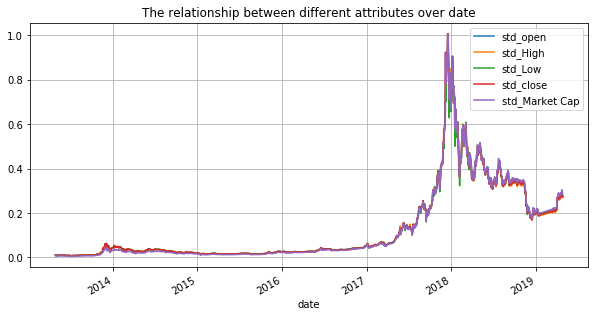

In [112]:
# Relationship between different attributes in the price dataset
gx = std_priceOfBitcoin.plot(x='date', y=['std_open', 'std_High', 'std_Low', 'std_close', 'std_Market Cap'], 
                             figsize=(10,5), grid=True)
gx.set_title('The relationship between different attributes over date')

Text(0.5, 1.0, 'Scatterplot of standardized open and close price')

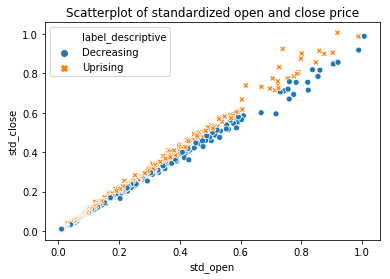

In [113]:
# scatterplot Relationship between std_open and std_close price
ax = sns.scatterplot(x="std_open", y="std_close", hue='label_descriptive', style='label_descriptive', data=std_priceOfBitcoin)
ax.set_title('Scatterplot of standardized open and close price')

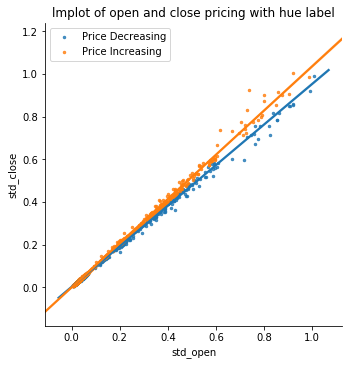

In [116]:
fag = sns.lmplot(x='std_open', y='std_close', hue='label_descriptive', data=std_priceOfBitcoin, 
                scatter_kws={'s': 6}, legend_out=False)
fag.ax.set_title("lmplot of open and close pricing with hue label")
leg = fag.axes[0, 0].get_legend()
leg.set_title(None)
labs = leg.texts
labs[0].set_text('Price Decreasing')
labs[1].set_text('Price Increasing')

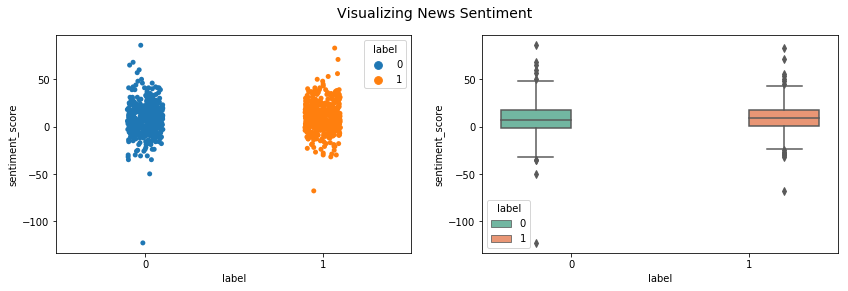

In [115]:
afinn_df = afinn_analysis(bitcoin_contents_price)

#### 3.1 Initial Hypothesis/Estimation
1. From above sentiment analysis, we could find that when the Bitcoin price is going up, more positive sentiment attitude to Bitcoin appears in the media contents. We believe that there is high probability or correlation between those media news and Bitcoin pricing variations
2. Caveats: We know that there are a lot of coincidence and other factors that might cause the Bitcoin price to change. This is only the view from media news we try to specify to Bitcoin investors. If you are one of the investors, there are a lot of other factors that you might to consider when you make a investment decision.

### 4 ML Analysis and cross-validation Evaluation
<img src="app.png" width="1000px" align="left" float="left"/>
Currently we have a dataset with 1077 data points. Each data point contains the news full article and the cryptocurrency price change for the day (0 for dump(decrease) and 1 for pump(increase)). Currently we only have a training set (80%) and a test set (20%).
<img src="Most contributing features in linear SVM model.png" width="500px" align="left" float="left"/>

In order to use this dataset with machine learning, we made a nice machine learning software named “Machine Learning with Text Data” (https://github.com/edgeslab/cs418-project-slamming-squad-1/tree/master/ML_TEXT ). It has a GUI built using PyQt5 and handles most major machine learning classifiers (SVM, Neural Network, kNN, etc.) Hyperparameters can be tuned inside the software. Its core function uses all techniques we learned in the class and homework about text data handling. It is tested with the tweets train data in our homework.
We feed our dataset to the software. We tried several types of classifiers and tuned some hyperparameters. We don’t want to use the test set too many times. So, we didn’t try all hyperparameters to avoid overfitting. Currently the best result we get is using polynomial SVM, which gives us a test score around 0.6. Considering the data set is relatively small, this is a promising result. In the future, we will extend the size of our dataset, we expect even better test score.
<img src="evaluation.png" width="500px" align="left" float="left"/>

We also used the software to plot the most contributing features in a linear SVM model (See figure on the left). Among the top 15 most contributing features, “decline”, “upward”, “fail” definitely make sense since they are directly related to price change. Some features like “800” remains mystery and it would be interesting to check why they are ranked so high among features. Maybe some of the features like “800” do have some importance on the prediction, and it is detected by our model, but we as human don’t know it. 

We checked several models (kNN, SVM, NN), among all the models, test error is always higher than 10FCV error, which may be a sign of overfitting. We may consider to tune the hyperparameters. 
By doing machine learning, we can see that even though a test score of 0.6 is not that high, but for a model based on and trained on test data, this is already promising. It provides us a potentially very useful model to predict the bitcoin price using the bitcoin news.

### 5 Overall Reflection: 

Our model is too rough. For the data processing part, since we use label 1 if the difference of Bitcoin daily close and open is positive, and label it as 0 otherwise. But it is possible that this difference is relatively small campare to its price. We should label it more say if the relative change is within 5% and label it 2 if the relative change is within 10%, and so on so forth. So that our model should be retrained with decision trees model to really clalssify the effect of different keywords appear in the media and news data set.

One more thing worth to comment here is that some of the Bitcoins news are written after the market massive move and they try to dig into the reasons for the Bitcoin pump or dump. We must take care of such kind of news too. And we shall also consider collect news data set from facebook? Twitter? Since Bitcoin's news spread much more quickly on twitter to people who care about Bitcoin.
